In [ ]:
from google.colab import drive
from IPython.display import Image
from pathlib import Path
from fastai.vision.all import *

drive.mount('/content/drive/')

!unzip -qq drive/MyDrive/emlyon/genre_classification/images_original.zip

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


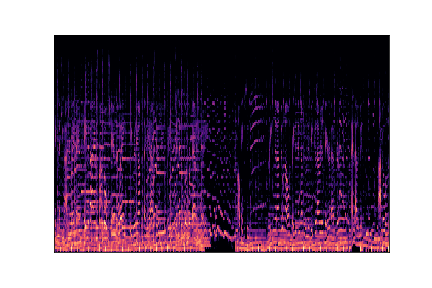

In [ ]:
Image.open('images_original/country/country00086.png')

In [ ]:
path = Path('images_original')

In [ ]:
fns = get_image_files(path)
fns

(#999) [Path('images_original/rock/rock00084.png'),Path('images_original/rock/rock00032.png'),Path('images_original/rock/rock00096.png'),Path('images_original/rock/rock00094.png'),Path('images_original/rock/rock00086.png'),Path('images_original/rock/rock00002.png'),Path('images_original/rock/rock00089.png'),Path('images_original/rock/rock00031.png'),Path('images_original/rock/rock00099.png'),Path('images_original/rock/rock00041.png')...]

In [ ]:
spectrograms = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [ ]:
dls = spectrograms.dataloaders(path)

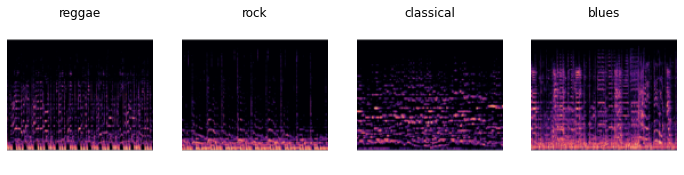

In [ ]:
dls.valid.show_batch(max_n=4, nrows=1)

In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,3.340662,1.981253,0.693467,00:08


epoch,train_loss,valid_loss,error_rate,time
0,2.408172,1.709227,0.542714,00:05
1,2.233335,1.466561,0.432161,00:05
2,2.000813,1.370750,0.402010,00:05
3,1.876580,1.352151,0.417085,00:05


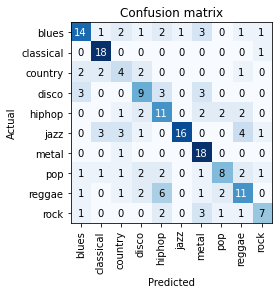

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
learn.export()